In [1]:
import pandas as pd
import random
import string

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
random.seed(41)

In [4]:
def plot_dist(train_df, test_df, val_df, by='from'):
    train_counts = dict(train_df[by].value_counts())
    test_counts = dict(test_df[by].value_counts())
    val_counts = dict(val_df[by].value_counts())
    df = pd.DataFrame({'train': train_counts,
                       'test': test_counts,
                        'val': val_counts}, index=train_counts.keys())
    df.plot.bar(figsize=(20,8))

In [ ]:
def remove_punctuation(data_df):
    geez_punctuations = '“«»፡።፣፤፥፦፧፨፠ '
    data_uncased = pd.DataFrame()
    data_uncased['source_lang'] = data_df['source_lang'].str.replace('[{}]'.format(string.punctuation+geez_punctuations), '').str.lower()
    data_uncased['target_lang']= data_df['target_lang'].str.replace('[{}]'.format(string.punctuation+geez_punctuations), '').str.lower()
    
    return data_uncased

In [5]:
def check_overlap(train_df, test_df, val_df):
    fitrered_train = remove_punctuation(train_df)
    filtered_test = remove_punctuation(test_df)
    filtered_val = remove_punctuation(val_df)
    src_duplicate = (set(fitrered_train['source_lang'])\
                    .intersection(set(filtered_test['source_lang'])))\
                    .union(set(fitrered_train['source_lang'])\
                    .intersection(set(filtered_val['source_lang'])))
    tgt_duplicate = (set(fitrered_train['target_lang'])\
                    .intersection(set(filtered_test['target_lang'])))\
                    .union(set(fitrered_train['target_lang'])\
                    .intersection(set(filtered_val['target_lang'])))
    src_tgt_duplicate = (set(fitrered_train['source_lang'])\
                    .intersection(set(filtered_test['target_lang'])))\
                    .union(set(fitrered_train['source_lang'])\
                    .intersection(set(filtered_val['target_lang'])))
    tgt_src_duplicate = (set(fitrered_train['target_lang'])\
                    .intersection(set(filtered_test['source_lang'])))\
                    .union(set(fitrered_train['target_lang'])\
                    .intersection(set(filtered_val['source_lang'])))
    
    overlaps = src_duplicate.union(tgt_duplicate).union(src_tgt_duplicate).union(tgt_src_duplicate)
    
    if not overlaps:
        print('NO Overlaps!')
    else:
        print('Ooops... There is an overlap!', len(overlaps))

In [6]:
def switch_direction(train_df, test_df, val_df):
    
    newtrain_df = train_df.rename(columns={'source_lang':'target_lang', 'target_lang':'source_lang'})
    newtest_df = test_df.rename(columns={'source_lang':'target_lang', 'target_lang':'source_lang'})
    newval_df = val_df.rename(columns={'source_lang':'target_lang', 'target_lang':'source_lang'})
    

    
    direction = '-'.join(train_df['direction'].iloc[0].split('-')[::-1])
    
    newtrain_df['direction'] = direction
    newtest_df['direction'] = direction
    newval_df['direction'] = direction
    
    newtrain_df = newtrain_df[['source_lang', 'target_lang', 'from', 'direction']]
    newtest_df = newtest_df[['source_lang', 'target_lang', 'from', 'direction']]
    newval_df = newval_df[['source_lang', 'target_lang', 'from', 'direction']]

    return newtrain_df, newtest_df, newval_df

In [7]:
amh_prefix = '<AMH>'
gez_prefix = '<GEZ>'
tir_prefix = '<TIR>'
en_prefix = '<EN>'

def add_prefix(df, prefix):
    new_df = df.copy()
    new_df['source_lang'] = prefix+' '+ df['source_lang'].astype(str)
    
    return new_df

### English - Ge'ez

In [8]:
bible_df = pd.read_csv('geez/en_gez.csv')
bible_df['from']='bible'
en_gez_df = bible_df

In [9]:
en_gez_df['direction'] = 'en-gez'

### English - Amharic

In [10]:
tanzil_df = pd.read_csv('amharic/en_amh_tanzil.csv')

In [11]:
uncased_tanzil = remove_punctuation(tanzil_df)
tanzil_duplicates = uncased_tanzil.duplicated('source_lang', keep='first')\
                |uncased_tanzil.duplicated('target_lang', keep='first')

tanzil_filtered_df = tanzil_df[~tanzil_duplicates]
tanzil_filtered_df['from'] = 'tanzil'

<ipython-input-11-5b0ed4083b80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tanzil_filtered_df['from'] = 'tanzil'


In [12]:
constitution_df = pd.read_csv('amharic/en_amh_constitution.csv')
constitution_df['from']='constitution'
history_df = pd.read_csv('amharic/en_amh_history.csv')
history_df['from'] = 'history'
jwdaily_df = pd.read_csv('amharic/en_amh_jwdaily.csv')
jwdaily_df['from'] = 'jwdaily'
news_df = pd.read_csv('amharic/en_amh_news.csv')
news_df['from'] = 'news'
opusbible_df = pd.read_csv('amharic/en_amh_opusbible.csv')
opusbible_df['from'] = 'bible'
ethiopicbible_df = pd.read_csv('amharic/en_amh_ethiopicbible.csv')
ethiopicbible_df['from'] = 'bible'
ebible_df = pd.read_csv('amharic/en_amh_ebible.csv')
ebible_df['from'] = 'bible'

# tanzil_df['from'] = 'tanzil'
tatoeba_df = pd.read_csv('amharic/en_amh_tatoeba.csv')
tatoeba_df['from'] = 'tatoeba'
ted_df = pd.read_csv('amharic/en_amh_ted.csv')
ted_df['from'] = 'ted'
wikimedia_df = pd.read_csv('amharic/en_amh_wikimedia.csv')
wikimedia_df['from'] = 'wikimedia'

In [13]:
en_amh_df = pd.concat([constitution_df, history_df, jwdaily_df, news_df, opusbible_df, ethiopicbible_df, ebible_df,
          tanzil_filtered_df, tatoeba_df, ted_df, wikimedia_df])

In [15]:
en_amh_df['direction'] = 'en-amh'

### English - Tigrinya

In [16]:
jwbible_df = pd.read_csv('tigrinya/en_tir_jwbible.csv')
jwbible_df['from']='bible'
tatoeba_df = pd.read_csv('tigrinya/en_tir_tatoeba.csv')
tatoeba_df['from'] = 'tatoeba'
tico_df = pd.read_csv('tigrinya/en_tir_tico.csv')
tico_df['from'] = 'tico'

In [17]:
en_tir_df = pd.concat([jwbible_df, tatoeba_df, tico_df])

In [18]:
en_tir_df['direction'] = 'en-tir'

### Amharic - Tigrinya

In [19]:
jwbible_df = pd.read_csv('amharic/amh_tir_jwbible.csv')
jwbible_df['from'] = 'bible'
jwdaily_df = pd.read_csv('amharic/amh_tir_jwdaily.csv')
jwdaily_df['from'] = 'jwdaily'
tico_df = pd.read_csv('amharic/amh_tir_tico.csv')
tico_df['from'] = 'tico'

In [20]:
amh_tir_df = pd.concat([jwbible_df, jwdaily_df, tico_df])
amh_tir_df['direction'] = 'amh-tir'

### Amharic-Ge'ez

In [21]:
ethiopicbible_df = pd.read_csv('amharic/amh_gez_ethiopicbible.csv')
ethiopicbible_df['from'] = 'bible'
tadesse_df = pd.read_csv('amharic/amh_gez_tadesse.csv')
tadesse_df['from'] = 'bible'

In [22]:
amh_gez_df = pd.concat([ethiopicbible_df, tadesse_df])
amh_gez_df['direction'] = 'amh-gez'

# Multilingual

In [23]:
mmt_df = pd.concat([en_amh_df, en_gez_df, en_tir_df, amh_tir_df,
                         amh_gez_df])
mmt_df.drop_duplicates(['source_lang', 'target_lang'], keep='first', inplace=True)
mmt_df.reset_index(drop=True, inplace=True)

In [24]:
mmt_df.head()

,source_lang,target_lang,from,direction
0,FEDERAL NEGARIT GAZETTE OF THE FEDERAL DEMOCRA...,የኢትዮጵያ ፌደራላዊ ዲሞክራሲያዊ ሪፐብሊክ ፌደራል ነጋሪት ጋዜጣ,constitution,en-amh
1,"and Year No.101 ADDIS ABABA 5 thAugest, 2016",ሃያ ሁለተኛ ዓመት ቁጥር ፩፻፩ አዲስ አበባ ሐምሌ ፳፱ ቀን ፪ሺ፰ዓ.ም,constitution,en-amh
2,Proclamation No.980/2016,ዋጅ ቁጥር ፱፻፹/፪ሺ፰ ዓ.ም,constitution,en-amh
3,Commercial and Licensing Proclamation …..……………...,ንግድ ምዝገባና ፍቃድ አዋጅ………..ገጽ ፱ሺ፩፻፺፬,constitution,en-amh
4,Registration Proclamation No. 980/2016,ዋጅ ቁጥር ፱፻፹/፪ሺ፰ ዓ.ም የንግድ ምዝገባና ፈቃድ አዋጅ,constitution,en-amh


In [25]:
len(mmt_df)

207262

In [26]:
ratio = {'en-amh':(.775, .155, .07), 'en-gez':(.80, .14, .06), 
         'en-tir':(.76, .16, .08), 'amh-tir':(.71, .2, .09), 'amh-gez':(.825, .12, .055)}

In [27]:
mmt_train_df, mmt_test_df, mmt_val_df = (pd.DataFrame() for _ in range(3))
sources = mmt_df.groupby('direction')['from'].unique()
directions = mmt_df['direction'].unique()
for direction in directions:
    for source in sources[direction]:
        df = mmt_df[(mmt_df['direction']==direction) & (mmt_df['from']==source)]
        shuffled_df = df.sample(frac=1, random_state=41).reset_index(drop=True)
        
        train_ratio, test_ratio, val_ratio = ratio[direction]
        size = len(df)
        train_size = int(size*train_ratio)
        test_size = int(size*test_ratio)
        val_size = int(size*val_ratio)
        
        train_df = shuffled_df.iloc[:train_size]
        test_df = shuffled_df.iloc[train_size: train_size+test_size]
        val_df = shuffled_df.iloc[train_size+test_size:]
        
        mmt_train_df = pd.concat([mmt_train_df, train_df])
        mmt_test_df = pd.concat([mmt_test_df, test_df])
        mmt_val_df = pd.concat([mmt_val_df, val_df])

mmt_train_df.reset_index(drop=True, inplace=True)
mmt_test_df.reset_index(drop=True, inplace=True)
mmt_val_df.reset_index(drop=True, inplace=True)

In [28]:
len(mmt_train_df), len(mmt_test_df), len(mmt_val_df)

(159266, 32890, 15106)

In [29]:
len(mmt_train_df)+len(mmt_test_df)+len(mmt_val_df)

207262

In [30]:
mmt_train_filtered = remove_punctuation(mmt_train_df)
mmt_test_filtered = remove_punctuation(mmt_test_df)
mmt_val_filtered = remove_punctuation(mmt_val_df)

# train_duplicates = mmt_train_filtered[mmt_train_filtered.duplicated(keep='first')].index.tolist()
test_duplicates = mmt_test_filtered.duplicated(['source_lang'], keep='first') | mmt_test_filtered.duplicated(['target_lang'], keep='first')
val_duplicates = mmt_val_filtered.duplicated(['source_lang'], keep='first') | mmt_val_filtered.duplicated(['target_lang'], keep='first')

test_src_duplicates = mmt_train_filtered.merge(mmt_test_filtered[~test_duplicates], indicator=True, on=['source_lang'], how='left',suffixes=[None,'_y'])\
     .query('_merge!="left_only"').index.tolist()
test_tgt_duplicates = mmt_train_filtered.merge(mmt_test_filtered[~test_duplicates], indicator=True, on=['target_lang'], how='left',suffixes=[None,'_y'])\
     .query('_merge!="left_only"').index.tolist()

val_src_duplicates = mmt_train_filtered.merge(mmt_val_filtered[~val_duplicates], indicator=True, on=['source_lang'], how='left',suffixes=[None,'_y'])\
     .query('_merge!="left_only"').index.tolist()
val_tgt_duplicates = mmt_train_filtered.merge(mmt_val_filtered[~val_duplicates], indicator=True, on=['target_lang'], how='left',suffixes=[None,'_y'])\
     .query('_merge!="left_only"').index.tolist()

In [31]:
test_src_tgt_duplicates = mmt_train_filtered.merge(mmt_test_filtered[~test_duplicates], indicator=True, left_on=['source_lang'], right_on=['target_lang'], how='left',suffixes=[None,'_y'])\
     .query('_merge!="left_only"').index.tolist()

test_tgt_src_duplicates = mmt_train_filtered.merge(mmt_test_filtered[~test_duplicates], indicator=True, left_on=['target_lang'], right_on=['source_lang'], how='left',suffixes=[None,'_y'])\
     .query('_merge!="left_only"').index.tolist()

val_src_tgt_duplicates = mmt_train_filtered.merge(mmt_val_filtered[~val_duplicates], indicator=True, left_on=['source_lang'], right_on=['target_lang'], how='left',suffixes=[None,'_y'])\
     .query('_merge!="left_only"').index.tolist()

val_tgt_src_duplicates = mmt_train_filtered.merge(mmt_val_filtered[~val_duplicates], indicator=True, left_on=['target_lang'], right_on=['source_lang'], how='left',suffixes=[None,'_y'])\
     .query('_merge!="left_only"').index.tolist()

In [32]:
duplicates = set(test_src_duplicates + test_tgt_duplicates\
                 + val_src_duplicates + val_tgt_duplicates + \
                test_src_tgt_duplicates + test_tgt_src_duplicates + val_src_tgt_duplicates + val_tgt_src_duplicates)

In [33]:
len(duplicates)

57295

In [34]:
mmt_train_df.drop(index=duplicates, inplace=True)
mmt_test_df = mmt_test_df[~test_duplicates]
mmt_val_df = mmt_val_df[~val_duplicates]

In [35]:
check_overlap(mmt_train_df, mmt_test_df, mmt_val_df)

NO Overlaps!


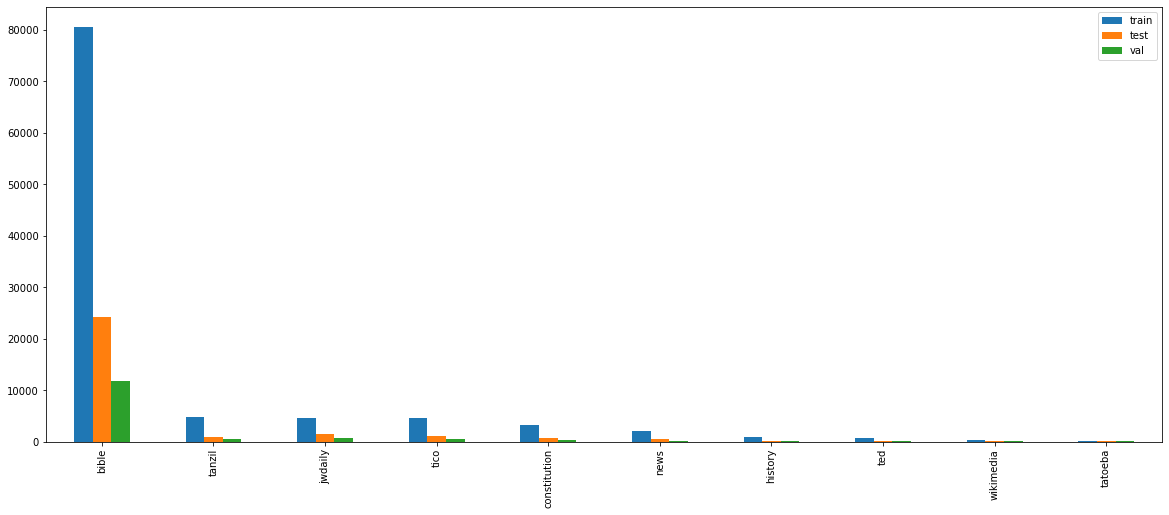

In [36]:
plot_dist(mmt_train_df, mmt_test_df, mmt_val_df, by='from')

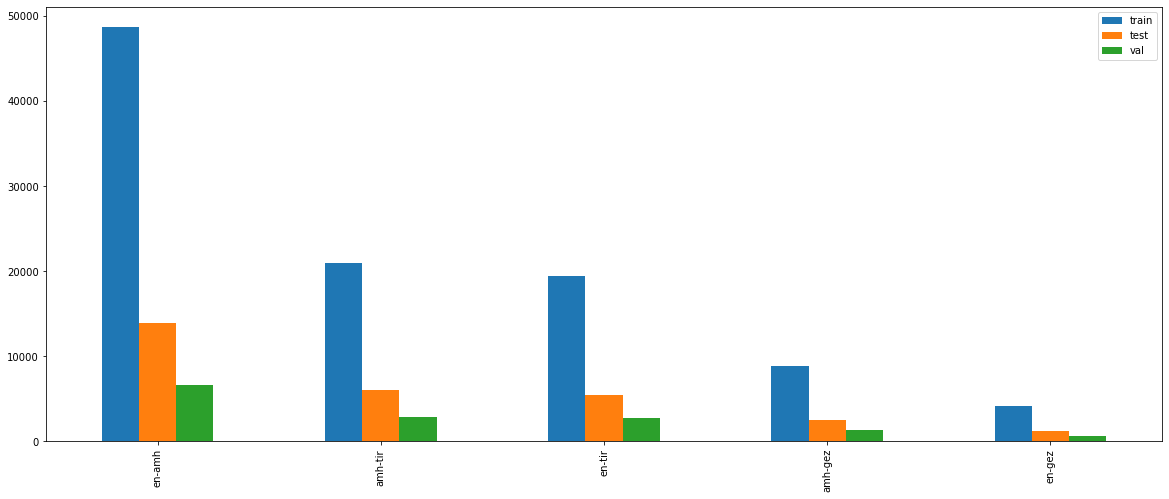

In [37]:
plot_dist(mmt_train_df, mmt_test_df, mmt_val_df, by='direction')

In [38]:
total_size = len(mmt_train_df) + len(mmt_test_df) + len(mmt_val_df)

print('train_size: '+'{:.2%}'.format(len(mmt_train_df)/total_size))
print('test_size: '+'{:.2%}'.format(len(mmt_test_df)/total_size))
print('val_size: '+'{:.2%}'.format(len(mmt_val_df)/total_size))

train_size: 70.23%
test_size: 20.03%
val_size: 9.73%


In [39]:
directions

array(['en-amh', 'en-gez', 'en-tir', 'amh-tir', 'amh-gez'], dtype=object)

In [40]:
#en-amh
en_amh_train_df = mmt_train_df[mmt_train_df['direction']=='en-amh']
en_amh_test_df = mmt_test_df[mmt_test_df['direction']=='en-amh']
en_amh_val_df = mmt_val_df[mmt_val_df['direction']=='en-amh']

en_gez_train_df = mmt_train_df[mmt_train_df['direction']=='en-gez']
en_gez_test_df = mmt_test_df[mmt_test_df['direction']=='en-gez']
en_gez_val_df = mmt_val_df[mmt_val_df['direction']=='en-gez']

en_tir_train_df = mmt_train_df[mmt_train_df['direction']=='en-tir']
en_tir_test_df = mmt_test_df[mmt_test_df['direction']=='en-tir']
en_tir_val_df = mmt_val_df[mmt_val_df['direction']=='en-tir']

amh_tir_train_df = mmt_train_df[mmt_train_df['direction']=='amh-tir']
amh_tir_test_df = mmt_test_df[mmt_test_df['direction']=='amh-tir']
amh_tir_val_df = mmt_val_df[mmt_val_df['direction']=='amh-tir']

amh_gez_train_df = mmt_train_df[mmt_train_df['direction']=='amh-gez']
amh_gez_test_df = mmt_test_df[mmt_test_df['direction']=='amh-gez']
amh_gez_val_df = mmt_val_df[mmt_val_df['direction']=='amh-gez']

gez_en_train_df, gez_en_test_df, gez_en_val_df = switch_direction(en_gez_train_df, en_gez_test_df, en_gez_val_df)
gez_amh_train_df, gez_amh_test_df, gez_amh_val_df = switch_direction(amh_gez_train_df, amh_gez_test_df, amh_gez_val_df)



In [41]:
en_amh_train_df = add_prefix(en_amh_train_df, amh_prefix)
en_amh_test_df = add_prefix(en_amh_test_df, amh_prefix)
en_amh_val_df = add_prefix(en_amh_val_df, amh_prefix)

en_gez_train_df = add_prefix(en_gez_train_df, gez_prefix)
en_gez_test_df = add_prefix(en_gez_test_df, gez_prefix)
en_gez_val_df = add_prefix(en_gez_val_df, gez_prefix)

en_tir_train_df = add_prefix(en_tir_train_df , tir_prefix)
en_tir_test_df = add_prefix(en_tir_test_df, tir_prefix)
en_tir_val_df = add_prefix(en_tir_val_df, tir_prefix)

amh_tir_train_df = add_prefix(amh_tir_train_df, tir_prefix)
amh_tir_test_df = add_prefix(amh_tir_test_df, tir_prefix)
amh_tir_val_df = add_prefix(amh_tir_val_df, tir_prefix)

amh_gez_train_df = add_prefix(amh_gez_train_df, gez_prefix)
amh_gez_test_df = add_prefix(amh_gez_test_df , gez_prefix)
amh_gez_val_df = add_prefix(amh_gez_val_df, gez_prefix)

gez_en_train_df = add_prefix(gez_en_train_df, en_prefix)
gez_en_test_df = add_prefix(gez_en_test_df, en_prefix)
gez_en_val_df = add_prefix(gez_en_val_df, en_prefix)

gez_amh_train_df = add_prefix(gez_amh_train_df, amh_prefix)
gez_amh_test_df = add_prefix(gez_amh_test_df, amh_prefix)
gez_amh_val_df = add_prefix(gez_amh_val_df, amh_prefix)

In [42]:
en_amh_train_df.to_csv('amharic/en_amh_train.csv')
en_amh_test_df.to_csv('amharic/en_amh_test.csv')
en_amh_val_df.to_csv('amharic/en_amh_val.csv')

en_gez_train_df.to_csv('geez/en_gez_train.csv')
en_gez_test_df.to_csv('geez/en_gez_test.csv')
en_gez_val_df.to_csv('geez/en_gez_val.csv')

en_tir_train_df.to_csv('tigrinya/en_tir_train.csv')
en_tir_test_df.to_csv('tigrinya/en_tir_test.csv')
en_tir_val_df.to_csv('tigrinya/en_tir_val.csv')

amh_tir_train_df.to_csv('amharic/amh_tir_train.csv')
amh_tir_test_df.to_csv('amharic/amh_tir_test.csv')
amh_tir_val_df.to_csv('amharic/amh_tir_val.csv')

amh_gez_train_df.to_csv('amharic/amh_gez_train.csv')
amh_gez_test_df.to_csv('amharic/amh_gez_test.csv')
amh_gez_val_df.to_csv('amharic/amh_gez_val.csv')

gez_en_train_df.to_csv('geez/gez_en_train.csv')
gez_en_test_df.to_csv('geez/gez_en_test.csv')
gez_en_val_df.to_csv('geez/gez_en_val.csv')

gez_amh_train_df.to_csv('amharic/gez_amh_train.csv')
gez_amh_test_df.to_csv('amharic/gez_amh_test.csv') 
gez_amh_val_df.to_csv('amharic/gez_amh_val.csv')

In [43]:
gez_amh_train_df.head()

,source_lang,target_lang,from,direction
138438,<AMH> ወሖረ ዳዊት ወአምጽኣ ለታቦተ እግዚአብሔር እምነ ቤተ አቢዳራ ው...,ዳዊትም ሄዶ የእግዚአብሔርን ታቦት ከአቢዳራ ቤት ወደ ዳዊት ከተማ በደስታ...,bible,gez-amh
138439,<AMH> አድኅነኒ እንእደ ፀርየ ወእምእለ ሮዱኒ።,ቸርነትህ እንደ ምን በዛች!,bible,gez-amh
138442,<AMH> ወተንሥአ ወሖረ ወበጽሐ በጊዜሃ ውስተ ውእቱ መካን ኀበ ይቤሎ እ...,ተነሥቶም እግዚአብሔር ወዳለው ቦታ ሄደ ።,bible,gez-amh
138445,<AMH> ወአእመረ ዳዊት ከመ ይመጽእ ሳኦል ይኅሥሦ ለዳዊት ወዳዊትሰ ሀለ...,ዳዊትም ሳኦል ነፍሱን ሊፈልግ እንደ ወጣ አየ፤ ዳዊትም በዚፍ ምድረ በዳ ...,bible,gez-amh
138449,<AMH> ይትራዐይዎ አስማሮ ይፈዲ ወለእመሰ አግመረ ገራህተ እንዘ ይበልዕ...,የሌላውንም እርሻ ቢያስበላ ከተመረጠ እርሻው ከማለፊያውም ወይኑ ይካስ ።,bible,gez-amh


In [44]:
amh_gez_train_df.head()

,source_lang,target_lang,from,direction
138438,<GEZ> ዳዊትም ሄዶ የእግዚአብሔርን ታቦት ከአቢዳራ ቤት ወደ ዳዊት ከተ...,ወሖረ ዳዊት ወአምጽኣ ለታቦተ እግዚአብሔር እምነ ቤተ አቢዳራ ውስተ ሀገረ...,bible,amh-gez
138439,<GEZ> ቸርነትህ እንደ ምን በዛች!,አድኅነኒ እንእደ ፀርየ ወእምእለ ሮዱኒ።,bible,amh-gez
138442,<GEZ> ተነሥቶም እግዚአብሔር ወዳለው ቦታ ሄደ ።,ወተንሥአ ወሖረ ወበጽሐ በጊዜሃ ውስተ ውእቱ መካን ኀበ ይቤሎ እግዚአብሔር...,bible,amh-gez
138445,<GEZ> ዳዊትም ሳኦል ነፍሱን ሊፈልግ እንደ ወጣ አየ፤ ዳዊትም በዚፍ ም...,ወአእመረ ዳዊት ከመ ይመጽእ ሳኦል ይኅሥሦ ለዳዊት ወዳዊትሰ ሀለወ ውስተ ...,bible,amh-gez
138449,<GEZ> የሌላውንም እርሻ ቢያስበላ ከተመረጠ እርሻው ከማለፊያውም ወይኑ ...,ይትራዐይዎ አስማሮ ይፈዲ ወለእመሰ አግመረ ገራህተ እንዘ ይበልዕ በሰመረ ...,bible,amh-gez


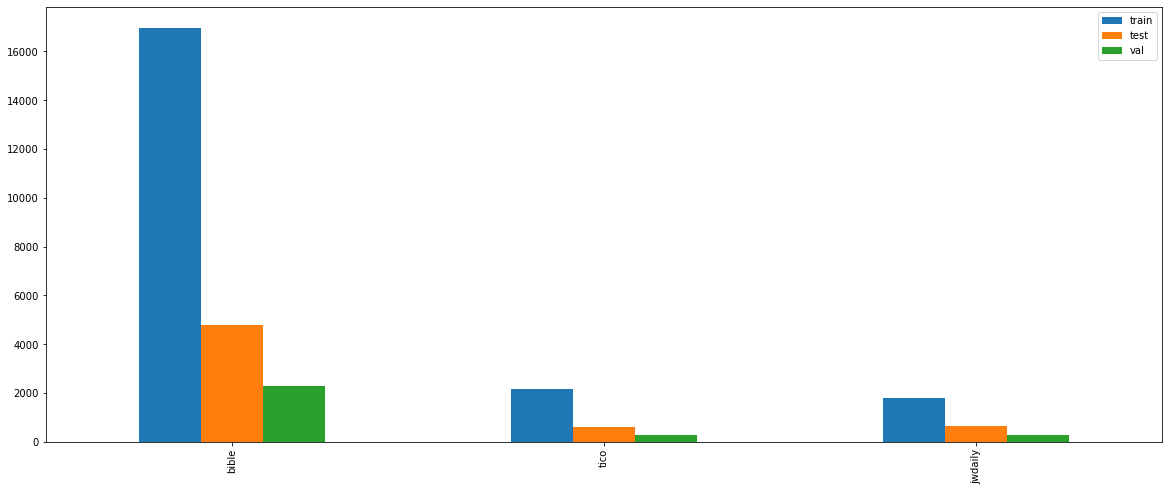

In [45]:
plot_dist(amh_tir_train_df, amh_tir_test_df, amh_tir_val_df)

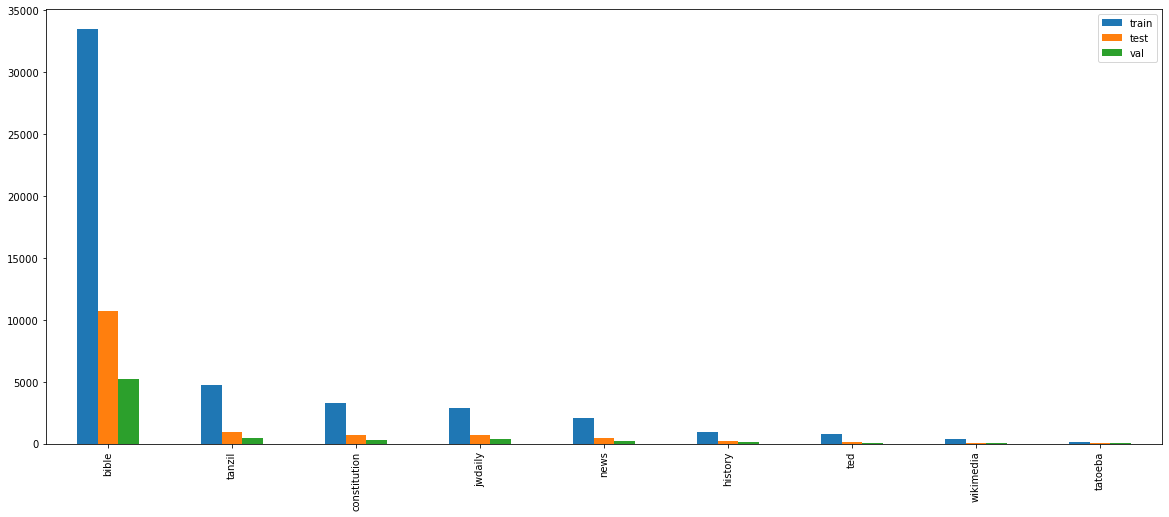

In [46]:
plot_dist(en_amh_train_df, en_amh_test_df, en_amh_val_df)

In [919]:
# direction = directions[4]

In [920]:
# en_amh_train_df = mmt_train_df[mmt_train_df['direction']==direction]
# en_amh_test_df = mmt_test_df[mmt_test_df['direction']==direction]
# en_amh_val_df = mmt_val_df[mmt_val_df['direction']==direction]

In [921]:
# total_size = len(en_amh_train_df) + len(en_amh_test_df) + len(en_amh_val_df)

# print('train_size: '+'{:.2%}'.format(len(en_amh_train_df)/total_size))
# print('test_size: '+'{:.2%}'.format(len(en_amh_test_df)/total_size))
# print('val_size: '+'{:.2%}'.format(len(en_amh_val_df)/total_size))

train_size: 69.65%
test_size: 20.20%
val_size: 10.15%
